<a href="https://colab.research.google.com/github/RafaelTorresCH/senalesysistemas_/blob/main/roperaciones_de_se_ales_continuas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operaciones básicas sobre señales

Las operaciones como la superposición, el cambio temporal y el escalamiento, se utilizan para construir señales con una estructura más compleja.

Se introduce un conjunto de operaciones elementales que se utilizan frecuentemente en el procesamiento de señales.

### Superposición

La superposición $x(t)$ de dos señales $x_1(t)$ and $x_2(t)$ está dada por:

\begin{equation}
x(t) = A \cdot x_1(t) + B \cdot x_2(t)
\end{equation}

con los pesos complejos $A, B \in \mathbb{C}$.

**Ejemplo**

El siguiente ejemplo ilustra la superposición de dos señales armónicas $x(t) = A \cdot \cos(\omega_1 t) + B \cdot \cos(\omega_2 t)$ con pesos $A$, $B$ y frecuencia angular $\omega_1$ y $\omega_2$.

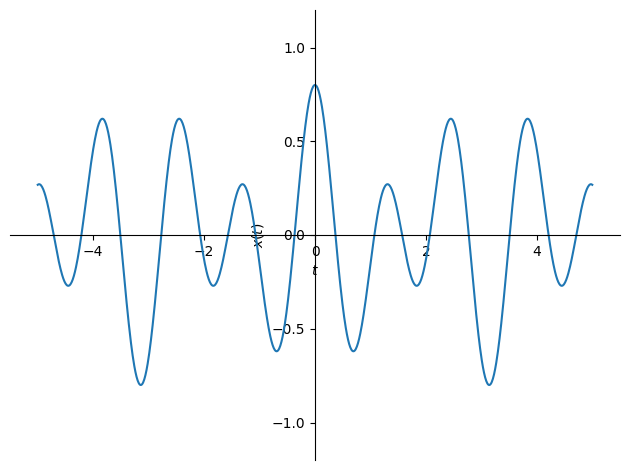

In [1]:
%matplotlib inline
import sympy as sym

t = sym.symbols('t', real=True)#se declara la variable simbólica t

#parámetros de las funciones cos
A = .3
om1 = 3
B = .5
om2 = 5

#operación superposición en sympy
x = A*sym.cos(om1*t) + B*sym.cos(om2*t)
#se grafica la señal resultante
sym.plot(x, (t,-5,5), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');


### Desplazamiento temporal

El desplazamiento temporal de una señal $s(t)$ en un instante de tiempo $\tau$ es una operación frecuentemente aplicada en el procesamiento de señales. Por ejemplo, para modelar la propagación de señales desde un actuador a un sensor.

El desplazamiento de la señal $x(t)$ está definido como:

\begin{equation}
x(t) = s(t-\tau)
\end{equation}

con $\tau \in \mathbb{R}$. La señal $s(t)$ es:

* desplazada hacia la derecha (*retrasada*) para $\tau > 0$
* desplazada hacia la izquierda para $\tau < 0$

**Ejemplo**

Para ilustrar el cambio temporal de señales, la construcción de una señal escalera por una superposición de desplazamiento se define como:

\begin{equation}
x(t) = \text{rect}\left(t - \frac{1}{2} \right) + \frac{2}{3} \cdot \text{rect}\left(t-\frac{3}{2} \right) + \frac{1}{3} \cdot \text{rect} \left(t-\frac{5}{2} \right)
\end{equation}



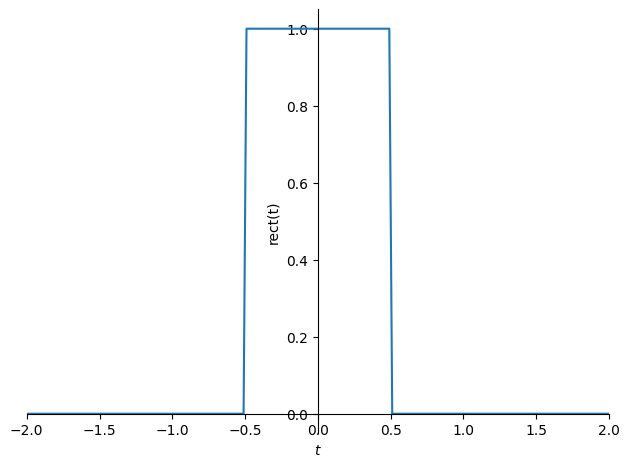

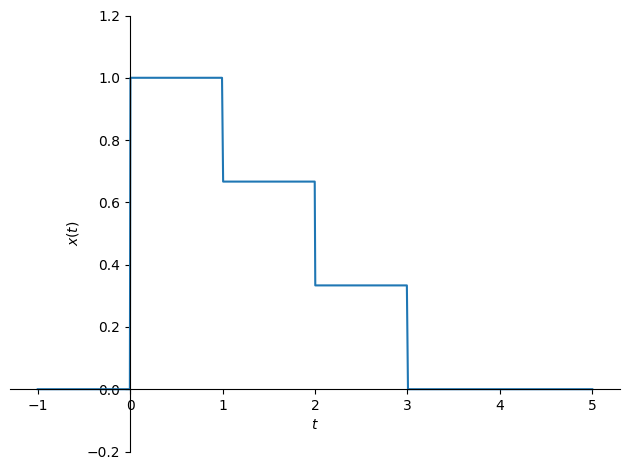

In [2]:
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)
sym.plot(rect, xlim=[-2,2], ylabel = r'rect(t)')
#los rect desplazados se acoplan con escalamientos diferentes
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)
sym.plot(x, (t, -1, 5), ylim=[-0.2, 1.2], ylabel='$x(t)$');

**Ejercicio**

* Agregar otro escalón al principio de la señal escalera modificando el ejemplo anterior.

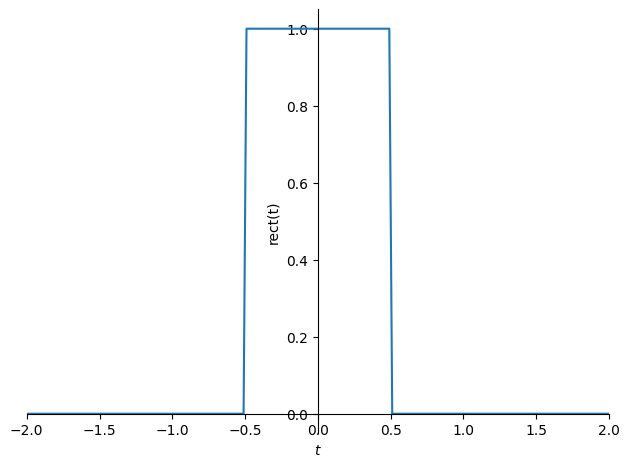

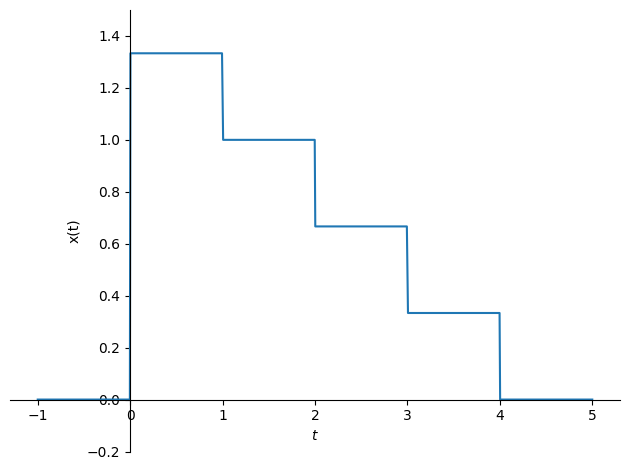

In [3]:
import sympy as sym

# Variable simbólica
t = sym.symbols('t', real=True)

# Definimos el pulso rectangular centrado en 0 y de duración 1
rect_base = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)

# Graficamos la función base rect(t)
sym.plot(rect_base, xlim=[-2, 2], ylabel='rect(t)')

# Construimos la señal escalonada renombrando cada instancia
x_escalonada = (4/3) * rect_base.subs(t, t - 0.5) + rect_base.subs(t, t - 1.5) +  (2/3) * rect_base.subs(t, t - 2.5) +  (1/3) * rect_base.subs(t, t - 3.5)

# Graficamos la nueva señal tipo escalera con nombres únicos
sym.plot(x_escalonada, (t, -1, 5), ylim=[-0.2, 1.5], ylabel='x(t)')


Lo que hice fue añadir ese nuevo escalon multiplicando por 4/3 es decir respetando la escala de cada escalo, y desplace el resto de escalones hacia la derecha

### Escalamiento temporal

El escalamiento temporal de una señal $s(t)$ está definido como:

\begin{equation}
x(t) = s(a \cdot t)
\end{equation}

con $a \in \mathbb{R}$. La señal $s(t)$ es

* estirada para $0 < a < 1$
* comprimida $a > 1$
* invertida y escalada para $a < 0$

Una aplicación de escalado temporal en el procesamiento de la señal es la escala de las señales estándar y el modelado del [efecto Doppler](https://en.wikipedia.org/wiki/Doppler_effect).

**Ejemplo**

El siguiente ejemplo ilustra el escalamiento de una señal escalera $y(t) = x(a \cdot t)$.

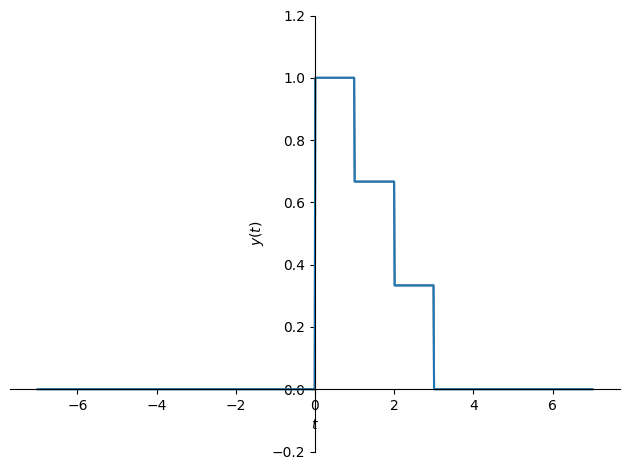

In [11]:
a = sym.symbols('a', real=True)
y = x.subs(t, a*t)

px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a,1), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)#se extiende los gráficos sobre una misma figura
px.show()

**Ejercicio**

* Modifique el ejemplo anterior para que la señal se comprima.
* Modifique el ejemplo anterior para que la señal se escale y se invierta. ¿Qué factor de escala `a`da como resultado un       estiramiento/compresión en este contexto?  


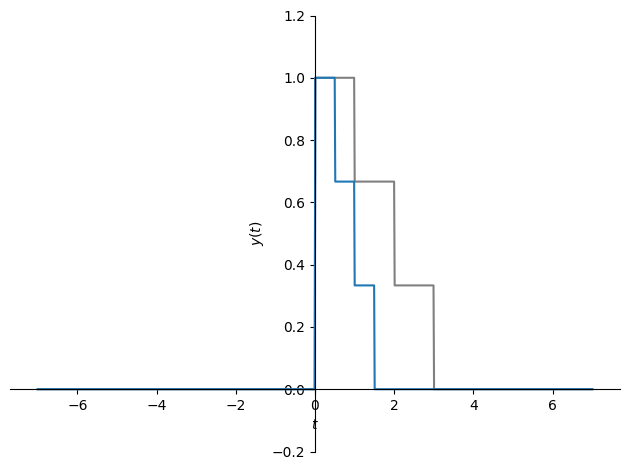

In [5]:
a = sym.symbols('a', real=True)
y = x.subs(t, a*t)

px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a,2), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)#se extiende los gráficos sobre una misma figura
px.show()

Comprimi la señal en base a la teoria es decir cambie el a entre 0 y 1

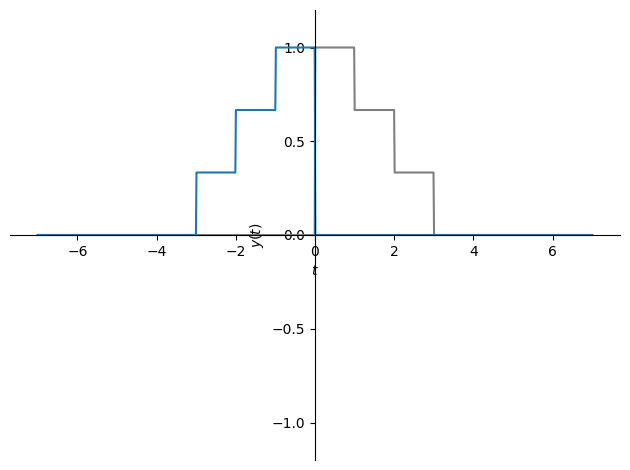

In [6]:
a = sym.symbols('a', real=True)
y = x.subs(t, a*t)

px = sym.plot(x, (t, -7, 7), ylim=[-1.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a,-1), (t, -7, 7), ylim=[-1.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)#se extiende los gráficos sobre una misma figura
px.show()

invertir con un a negativo y escale con el valor del a > 1
Si 0 < a < 1, la señal se estira (se ve más ancha).
Si a > 1, la señal se comprime (se ve más angosta).
Si a < 0, la señal se invierte y además se estira o comprime según el valor absoluto de a.


### Desplazamiento Temporal

El desplazamiento temporal de una señal $s(t)$ está definido como

\begin{equation}
x(t) = s(\tau - t)
\end{equation}

para $\tau \in \mathbb{R}$. Como $s(\tau - t) = s(- (t - \tau))$ la operación espejo también se puede representar como una inversión temporal de la señal $s(t)$ seguida por un desplazamiento de $\tau$ de la señal invertida. Para $\tau = 0$ este resultado es solo una inversión temporal de la señal.

La operación de cambio temporal puede interpretarse geométricamente como un reflejo de la señal $s(t)$ en el eje vertical $t=\frac{\tau}{2}$.

**Ejemplo**

El siguiente ejemplo ilustra el cambio temporal $y(t) = x(\tau - t)$ de la señal escalera $x(t)$ anteriormente introducida.

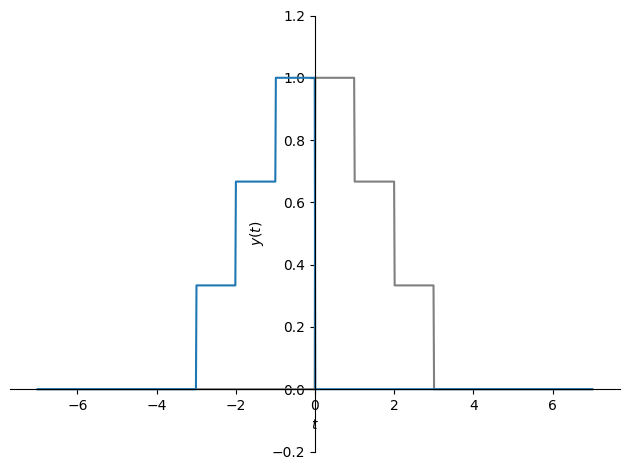

In [21]:
tau = 0
y = x.subs(t, tau - t)

px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', line_color='gray', show=False)
py=sym.plot(y, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

**Ejercicio**

* Para que valor de $\tau$, ¿la señal comienza en $t=0$?
* Realice un cambio temporal dividiendo en dos operaciones consecutivas: (i) Inversión temporal y (ii) Desplazamiento temporal.

Para un T de 3.5 ya que es alli donde se termina la primer señal, lo que se hizo fue mover el origen d e la invertida has en t = 0 y eso se logro con ese T

```
# Esto tiene formato de código
```



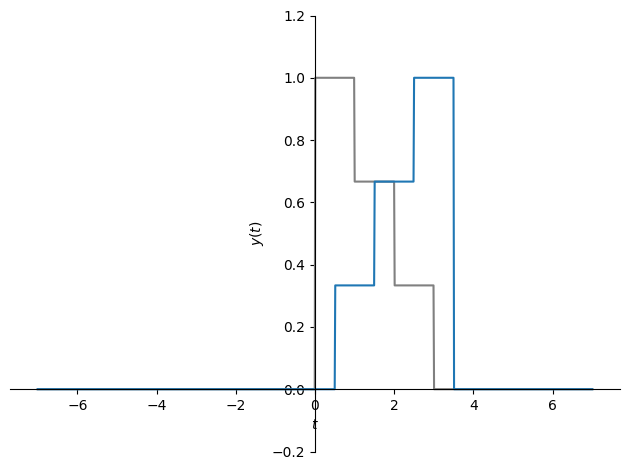

In [22]:
tau = 3.5
y = x.subs(t, tau - t)

px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', line_color='gray', show=False)
py=sym.plot(y, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

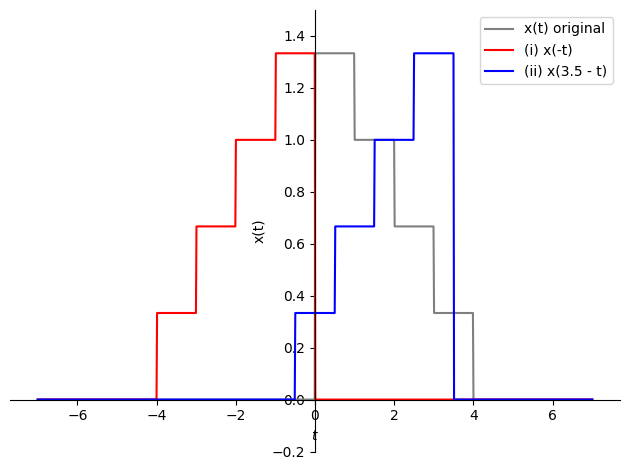

In [23]:
import sympy as sym
import matplotlib.pyplot as plt

# Variable simbólica
t = sym.symbols('t', real=True)

# Definir la señal escalera original usando funciones rectangulares desplazadas
rect_base = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)
x = (4/3)*rect_base.subs(t, t - 0.5) + \
    rect_base.subs(t, t - 1.5) + \
    (2/3)*rect_base.subs(t, t - 2.5) + \
    (1/3)*rect_base.subs(t, t - 3.5)

# Paso (i): Inversión temporal
x_invertida = x.subs(t, -t)

# Paso (ii): Desplazamiento temporal (tau = 3.5)
tau = 3.5
y = x_invertida.subs(t, t - tau)  # Esto equivale a x(tau - t)

# Graficar todas las señales
p1 = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.5], line_color='gray', show=False, ylabel='x(t)')
p2 = sym.plot(x_invertida, (t, -7, 7), ylim=[-0.2, 1.5], line_color='red', show=False)
p3 = sym.plot(y, (t, -7, 7), ylim=[-0.2, 1.5], line_color='blue', show=False)

# Etiquetas de cada curva
p1[0].label = 'x(t) original'
p2[0].label = '(i) x(-t)'
p3[0].label = '(ii) x(3.5 - t)'

# Combinar y mostrar
p1.extend(p2)
p1.extend(p3)
p1.legend = True
p1.show()


No hay mucho que decir solo que invertimos primero y luego desplazamos en 3,5

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.